# Lecture 01 -solution
## **Warm up Exercise**

### load packages

In [1]:
import numpy as np
from scipy import signal
from PIL import Image
from matplotlib import pyplot as plt
import PIL

### load image

In [2]:
img_filename = './imgs/coins.png'
with Image.open(img_filename) as img:
    img.show()  # display the image, you may also use display(img)
    print(img.size, img.mode)  # print the info of the image
    img_g = img.convert('F') 
    print(img_g.size, img_g.mode)
    img_arr = np.array(img_g)

(240, 196) RGB
(240, 196) F


### Convolutions

#### 1. Construct a filter kernel used for blurring

In [3]:
# Construct a filter kernel used for blurring
mean_kernel = np.ones((11, 11)) / (11*11)

In [4]:
# convolution 
mean_arr = signal.convolve2d(img_arr, mean_kernel, mode='same', boundary='symm') # Q: how do the parameter 'mode' and 'boundary' make a difference?

In [5]:
print('Shape of original:  ', img.size)
print('Shape of convolved: ', mean_arr.shape)

Shape of original:   (240, 196)
Shape of convolved:  (196, 240)


Text(0.5, 0, 'image after convolution')

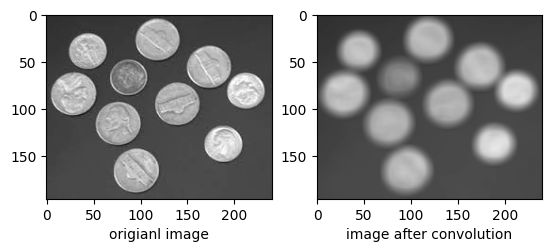

In [6]:
# Display the results
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
axs[0].set_xlabel('origianl image')
axs[1].imshow(mean_arr, cmap='gray', vmin=0, vmax=255)
axs[1].set_xlabel('image after convolution')

#### 2. Construct a filter kernel used for sharpening

In [7]:
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

In [8]:
# Convolution
sharpen_arr = signal.convolve2d(img_arr, sharpen_kernel, mode='same', boundary='symm')

Text(0.5, 0, 'image after convolution')

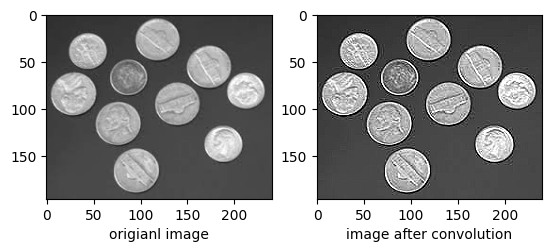

In [9]:
# Display the results
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
axs[0].set_xlabel('origianl image')
axs[1].imshow(sharpen_arr, cmap='gray', vmin=0, vmax=255)
axs[1].set_xlabel('image after convolution')

#### 3. Try some other kernels?

## **Task 1**

#### Thresholding
Use the operators >, <, >=, <= to threshold the image using an arbitrary threshold. 

That is, divide the image pixels into two classes, the ones below and the ones above the threshold, 

and give them different values (e.g. 0 and 255)

In [10]:
THRE = 90
img_thre = img_arr > THRE

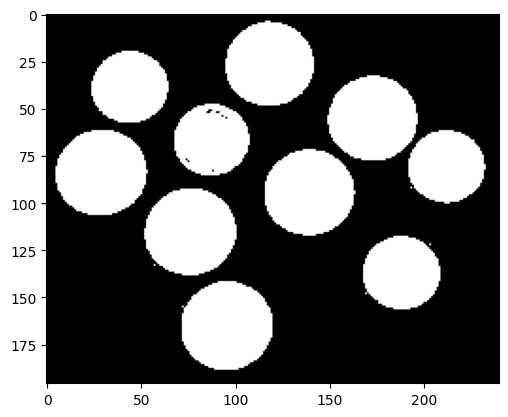

In [11]:
# display the result
plt.imshow(img_thre, cmap='gray')
img_thre = img_thre.astype(int)

### **Think:** why the segmentation can be so easily implemented simply by thresholding? 
try plot the histogram of the image, you will understand.

## **Task 2**

### Use the methods in Pillow to implement 
https://pillow.readthedocs.io/en/stable/handbook/index.html
1. vertically flipped
2. horizontally flipped
3. rotated by 90 degrees

In [12]:
# load and display image
img_filename = './imgs/windows-xp.jpg'
with Image.open(img_filename) as img_obj:
    img_obj.show()  # display the image, you may also use display(img)
    # if you fail to run the codes below, try to put the codes here, under the 'with Image.open(...)'


In [13]:
# one solution
flip1 = img_obj.rotate(90)
flip1.show()

In [14]:
# another way

In [15]:
# 1. vertically flipped
verti_flipped = img_obj.transpose(Image.FLIP_TOP_BOTTOM) 
verti_flipped.show()

In [16]:
# 2. horizontally flipped
hori_flipped = img_obj.transpose(Image.FLIP_LEFT_RIGHT) 
hori_flipped.show()

In [17]:
# 3. rotated by 90 degrees
rotated90 = img_obj.transpose(Image.ROTATE_90) 
rotated90.show()
# display(rotated90)

## **Task 3**
#### Implement the **function swap_RB()** where:
+ In the returned image, the red and blue channels of the input image have to be swapped.
+ You can carry out the operation using arraying indexing or with loops

In [18]:
def swap_RB(filename):
    # load and display image
    with Image.open(filename) as img_obj:
        img_obj.show()  # display the image, you may also use display(img)
        print(img_obj.mode) 
    # convert the Image object to numpy array
    img_arr = np.array(img_obj)
    print(img_arr.shape)
    # create a new image with the same size as the original image
    swap_RB_img = np.zeros(img_arr.shape)
    swap_RB_img[:,:,0]=img_arr[:,:,2]
    swap_RB_img[:,:,1]=img_arr[:,:,1]
    swap_RB_img[:,:,2]=img_arr[:,:,0]
    img_swap = Image.fromarray(np.uint8(swap_RB_img))
    img_swap.show()

In [ ]:
# test the function
img_filename = './imgs/windows-xp.jpg'
swap_RB(img_filename)

In [ ]:
img_filename = './imgs/RGB.jpg'
swap_RB(img_filename)